In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
def load_res(layer, model):
    res = pd.read_csv(f'../residuals/simple{layer}/{model}.csv')
    res.columns = ['t','r','sd']
    return res

Text(0.5, 1.0, 'QQ plot')

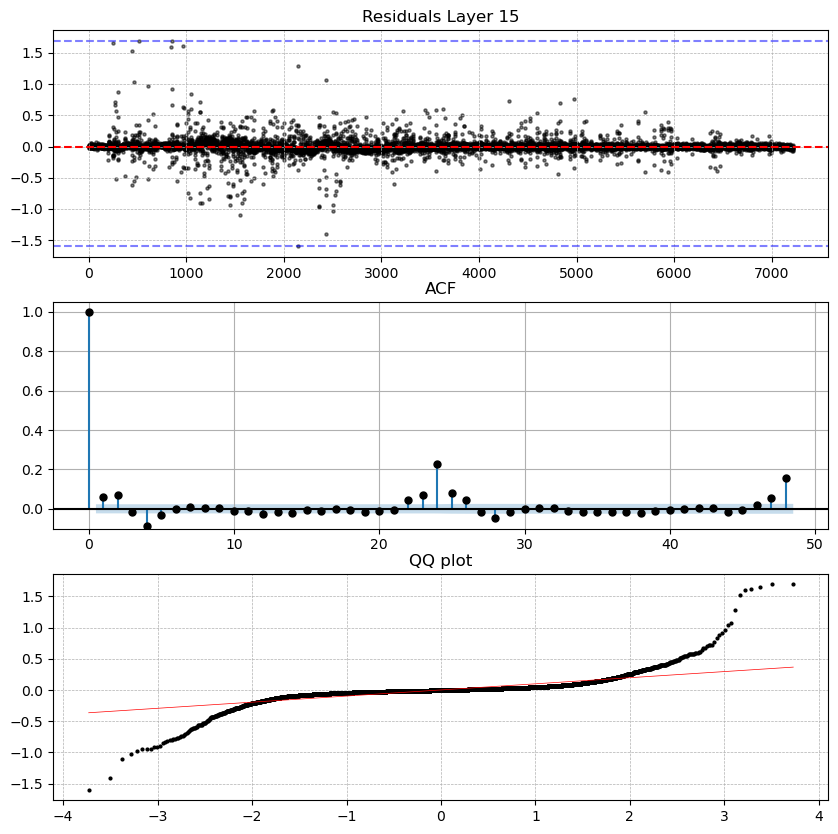

In [3]:

layer = 15




model = 'model3'

res = load_res(layer, model)
res = res[50:]
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
x = np.arange(0, len(res))
ax[0].scatter(x,res.r, s=5, alpha = 0.5, c='k')
ax[0].set_title(f'Residuals Layer {layer}')
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].axhline(y=res.r.max(), color='b', linestyle='--', alpha=0.5)
ax[0].axhline(y=res.r.min(), color='b', linestyle='--', alpha=0.5)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
# ACF
plot_acf(res.r, ax=ax[1], lags=48, color='k', missing ='drop', title='ACF');
ax[1].grid(True)
ax[1].set_ylim(-0.1,1.05)
# QQ plot
osm, osr = probplot(res.r.dropna())
s, i, r = osr
ax[2].plot(osm[0], osm[1], 'o', color='k', markersize=2)
ax[2].plot(osm[0], s*osm[0]+i, color='r', linewidth=0.5)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)   
ax[2].set_title('QQ plot')



## params



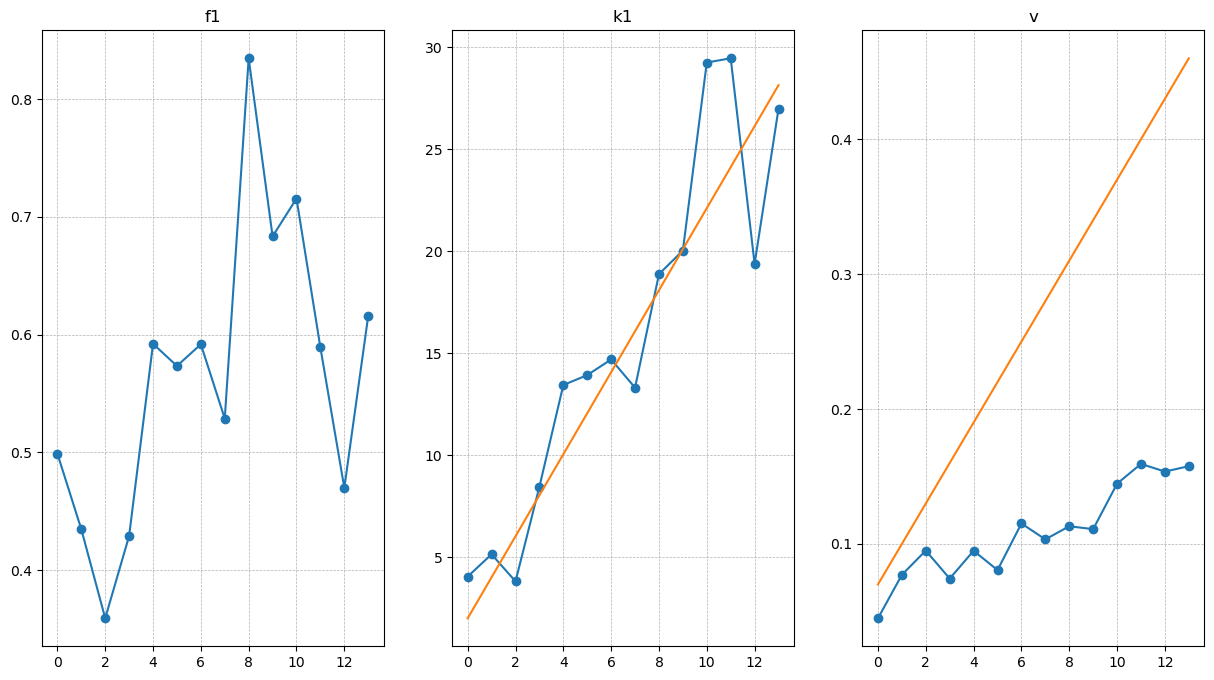

In [4]:
f1 = [-0.4989107, -0.4347566, -0.3591011, -0.4290061, -0.5922358, -0.5733842, -0.5918181, -0.5286904, -0.8347055, -0.6834661,  0.7155814 , 0.5890786 ,0.4698347,  0.6158887]
k1 = [4.054231 ,  5.146209 ,  3.818763 ,  8.457097 ,13.443027  ,13.928476, 14.695680 , 13.312021 , 18.875461 , 20.035248,-29.249122, -29.457640,-19.380444 ,-26.980431]
v = [1.576253e-01 ,1.536407e-01 ,1.593344e-01 ,1.446523e-01, 1.109652e-01,1.131090e-01 ,1.033882e-01, 1.151541e-01 ,8.060898e-02, 9.494536e-02, 0.07429546 ,9.507803e-02, 7.710201e-02 ,4.489243e-02]

f1 = np.array(f1)
k1 = np.array(k1)
v = np.array(v[::-1])

k = 2.01
v_ = 0.03

fig, ax = plt.subplots(1, 3, figsize=(15, 8))

ax[0].plot(abs(f1),marker='o')
ax[0].set_title('f1')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].plot(abs(k1),marker='o')
ax[1].set_title('k1')
ax[1].plot(k*np.arange(1,15))

ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].plot(v,marker='o')
ax[2].plot(v_*np.arange(1,15)+0.04)
ax[2].set_title('v')
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)



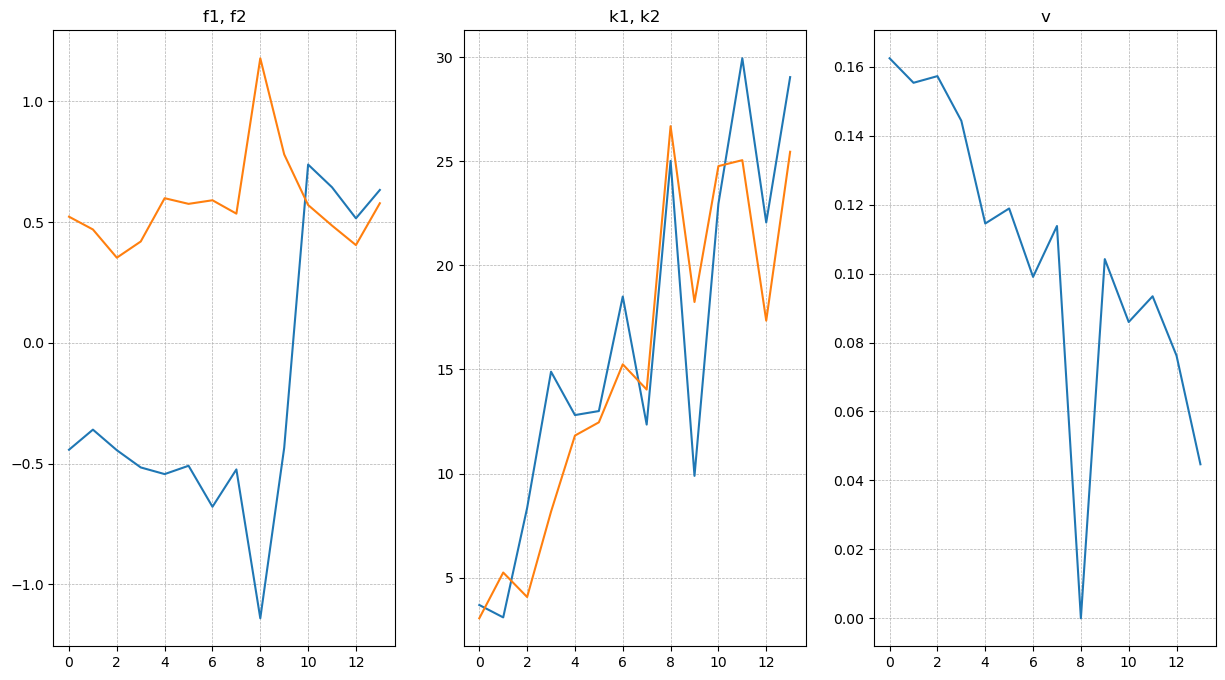

In [5]:
f1 = [-0.4428132, -0.3595978, -0.4446817, -0.5160454, -0.5436132, -0.5091382,-0.6788667, -0.5242434, -1.1403843, -0.4346937,  0.7377082,  0.6435895, 0.5151078,  0.6324894]
f2 = [-0.5217701, -0.4689331, -0.3521380, -0.4191533, -0.5983256, -0.5749298, -0.5898107, -0.5344769, -1.1775120, -0.7796747,  0.5702423,  0.4849610, 0.4042984,  0.5774609]

k1 = [3.682883, 3.087024, 8.345014, 14.892651, 12.808388, 13.001146, 18.504713, 12.352632, 25.021563, 9.887154, -22.960184, -29.951670, -22.062359, -29.046827]
k2 = [3.044838, 5.242156, 4.065896, 8.167953, 11.823403, 12.459846, 15.246811, 14.035075, 26.689127, 18.242663, -24.770573, -25.055720, -17.346984, -25.460153]

v = [1.624650e-01, 1.553550e-01, 1.572854e-01, 1.443330e-01, 1.145275e-01, 1.188933e-01, 9.904514e-02, 1.138065e-01, 1.009491e-07, 1.042026e-01, 8.595281e-02, 9.341787e-02, 7.620469e-02, 4.467386e-02]

f1 = np.array(f1)
f2 = np.array(f2)
k1 = np.array(k1)
k2 = np.array(k2)
v = np.array(v)

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
ax[0].plot((f1))
ax[0].plot(abs(f2))
ax[0].set_title('f1, f2')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].plot(abs(k1))
ax[1].plot(abs(k2))
ax[1].set_title('k1, k2')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].plot(v)
ax[2].set_title('v')
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)


In [6]:
X = np.vstack((np.ones(len(v)),np.arange(-14, 0)))
# X = np.vstack((np.ones(len(v)),np.arange(0, 14)))


a, b = np.linalg.inv(X @ X.T) @ X @ 

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(v)
ax.plot(a+b*np.arange(1, len(v)+1))
print(a,b)

SyntaxError: invalid syntax (1175760556.py, line 5)

In [ ]:
import numpy as np
from numpy import log, exp


res = pd.read_csv(f'../residuals/base_model.csv', index_col=0)
res

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-1.320000e-09,3.044395e-09,-3.217366e-09,2.939075e-09,2.500000e-02,0.025000,-8.333331e-03,1.666669e-02,-0.041667,0.050000,0.047733,-0.049382,-0.020786,0.108838,0.011515,-0.060889
3,-1.319993e-09,3.044420e-09,-3.217373e-09,2.612527e-09,2.275618e-08,-0.025000,-6.043784e-09,-8.333297e-03,-0.025000,-0.050000,0.028665,-0.074736,-0.045542,0.102013,0.029107,-0.061898
4,-1.666667e-02,-3.333333e-02,4.166666e-02,2.612520e-09,-5.000000e-02,0.041667,8.333335e-03,1.666668e-02,0.041667,-0.066667,0.011040,-0.083729,-0.012061,0.111002,0.016367,-0.057878
5,-8.333350e-03,-1.666670e-02,-3.333330e-02,2.721379e-09,3.333328e-02,0.008333,-8.333324e-03,3.677216e-08,-0.041667,0.008333,0.003088,-0.051202,-0.028227,0.127236,0.006443,-0.040303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,-5.607428e-03,-6.197451e-03,3.858628e-02,4.007321e-02,1.269358e-01,-0.122002,2.637367e-02,7.804552e-03,0.002802,0.035702,-0.007047,0.004579,-0.001369,-0.002592,-0.007444,0.025365
4498,-3.325172e-02,-3.770123e-02,1.640470e-02,6.658304e-02,9.248192e-02,-0.087590,-1.535421e-02,1.570876e-02,-0.013990,0.003058,-0.024184,-0.003842,-0.001448,-0.002590,0.017563,0.000809
4499,-1.648003e-02,-6.934886e-02,-2.211344e-02,2.808764e-02,1.394167e-01,-0.092964,-1.708407e-02,-8.866276e-03,0.010508,0.028511,-0.024468,-0.003842,-0.001448,-0.002589,0.001095,0.042549
4500,9.803857e-04,-3.871237e-02,5.557440e-02,3.948138e-02,8.832286e-02,-0.116266,-1.885697e-02,2.444047e-02,0.019088,0.020599,-0.000091,-0.003850,-0.001449,-0.002592,0.009484,0.017984


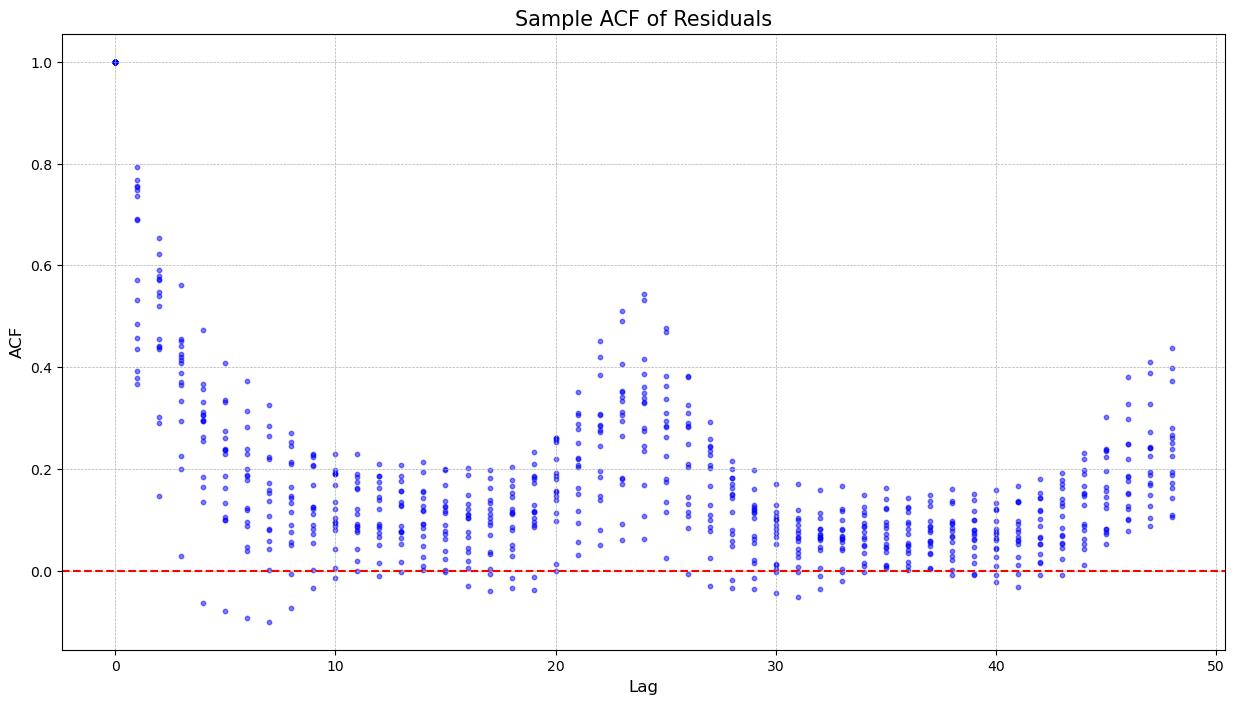

In [ ]:
from statsmodels.tsa.stattools import acf
import matplotlib.cm as cm
res = pd.read_csv(f'../residuals/base_model.csv', index_col=0)
res
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax.scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
cm.winter
ax.set_title('Sample ACF of Residuals', fontsize=15)
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('ACF', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.axhline(y=0, color='r', linestyle='--')

In [7]:
from statsmodels.tsa.stattools import qqplot
import matplotlib.cm as cm
res = pd.read_csv(f'../residuals/base_model4.csv', index_col=0)
res
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
for i in range(0, 16):
    qqplot(res[f'X{i}'], line='s', ax=ax, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)
# ax.legend(ncol = 4)
# ax.set_title('Sample ACF of Residuals', fontsize=15)
# ax.set_xlabel('Lag', fontsize=12)
# ax.set_ylabel('ACF', fontsize=12)
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.axhline(y=0, color='r', linestyle='--')

ImportError: cannot import name 'qqplot' from 'statsmodels.tsa.stattools' (/opt/miniconda3/envs/DTU/lib/python3.12/site-packages/statsmodels/tsa/stattools.py)

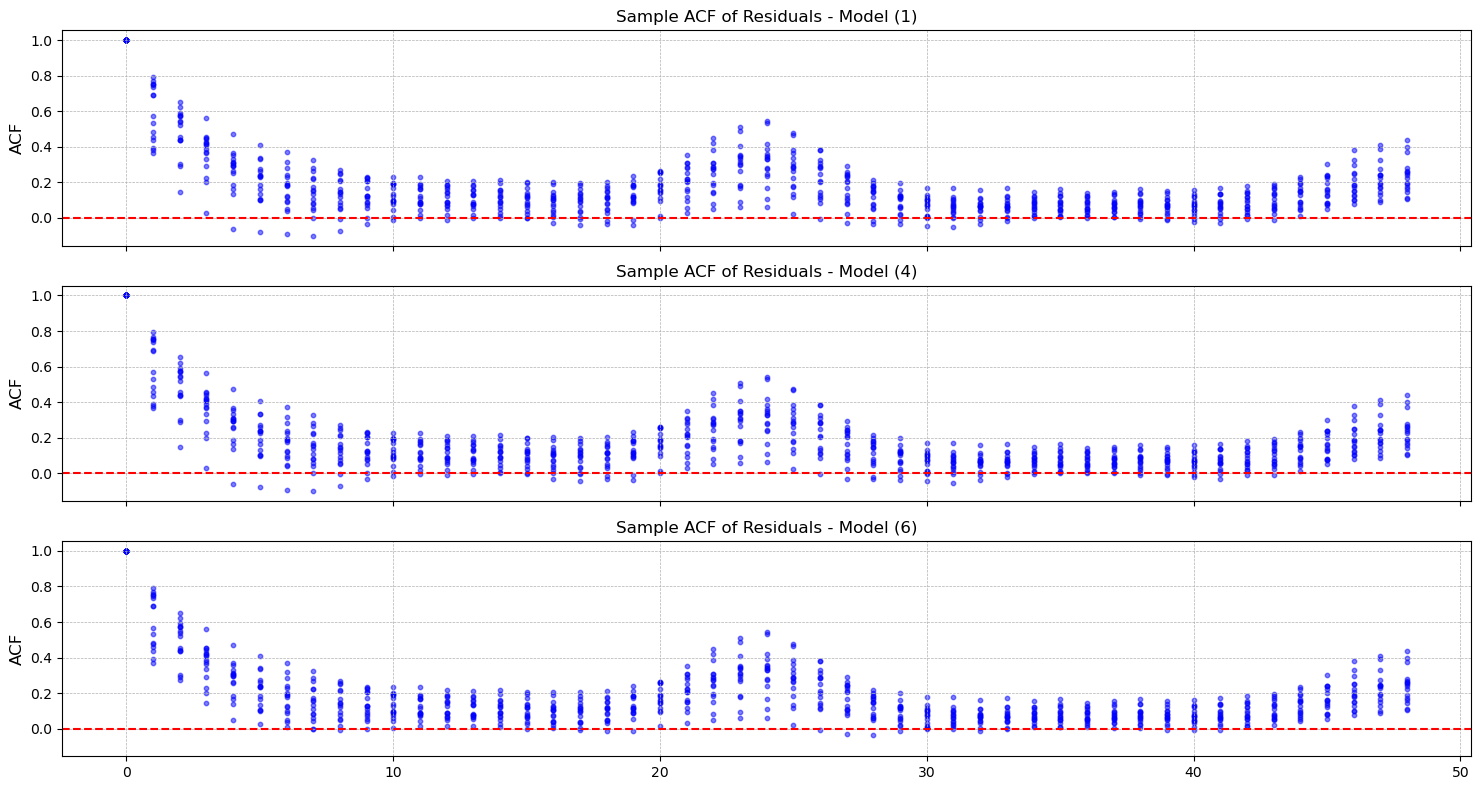

In [8]:
import numpy as np
from numpy import log, exp
from statsmodels.tsa.stattools import acf
import matplotlib.cm as cm


fig, ax = plt.subplots(3, 1, figsize=(15, 8), sharex=True, sharey=True)

res = pd.read_csv(f'../residuals/base_model.csv', index_col=0)

for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[0].scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
ax[0].set_title('Sample ACF of Residuals - Model (1)', fontsize=12)
# ax[0].set_xlabel('Lag', fontsize=12)
ax[0].set_ylabel('ACF', fontsize=12)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[0].axhline(y=0, color='r', linestyle='--')

res = pd.read_csv(f'../residuals/base_model.csv', index_col=0)

for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[1].scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
ax[1].set_title('Sample ACF of Residuals - Model (4)', fontsize=12)
# ax[1].set_xlabel('Lag', fontsize=12)
ax[1].set_ylabel('ACF', fontsize=12)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].axhline(y=0, color='r', linestyle='--')
res = pd.read_csv(f'../residuals/base_model_k_pos32.csv', index_col=0)
for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[2].scatter(np.arange(0, len(sacf)),sacf, color = 'blue', alpha = 0.5, s = 10)

# ax[2].legend()
ax[2].set_title('Sample ACF of Residuals - Model (6)', fontsize=12)
# ax[2].set_xlabel('Lag', fontsize=12)
ax[2].set_ylabel('ACF', fontsize=12)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].axhline(y=0, color='r', linestyle='--')
fig.tight_layout()

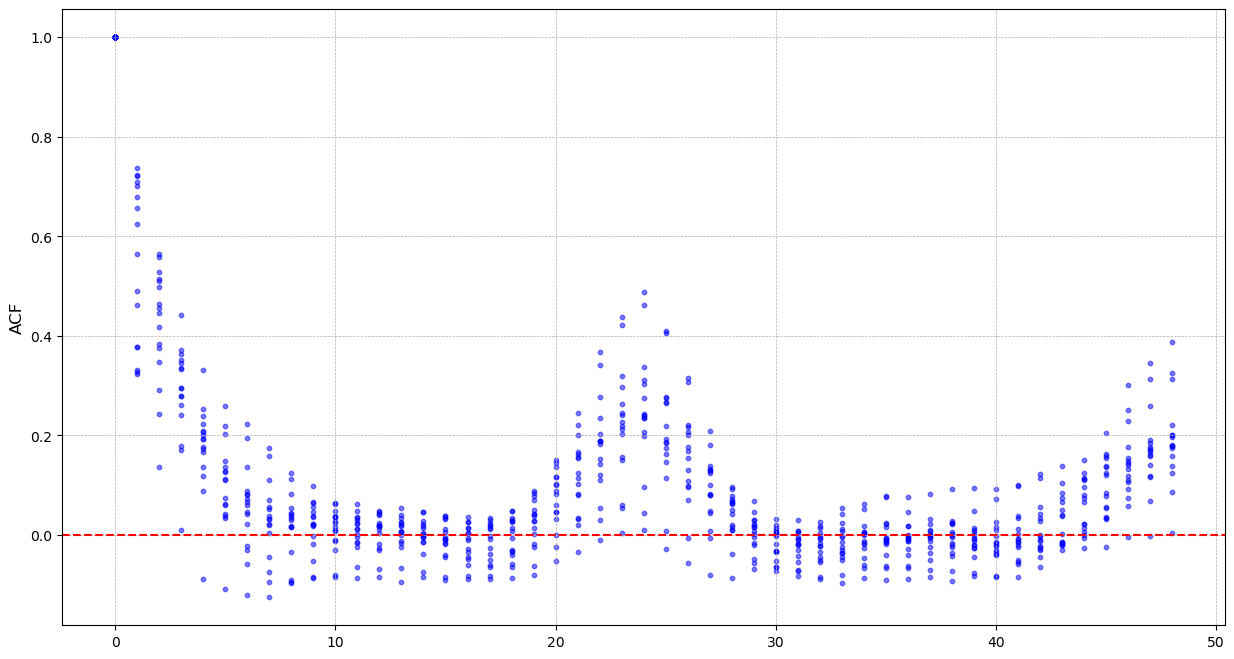

In [ ]:
import numpy as np
from numpy import log, exp
from statsmodels.tsa.stattools import acf
import matplotlib.cm as cm


fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharex=True, sharey=True)

# ax.legend(ncol = 4)
# ax[0].set_title('Sample ACF of Residuals', fontsize=15)
# ax[0].set_xlabel('Lag', fontsize=12)
ax.set_ylabel('ACF', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.axhline(y=0, color='r', linestyle='--')

res = pd.read_csv(f'../residuals/base_model_k_pos4.csv', index_col=0)

for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax.scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
# ax[1].set_title('Sample ACF of Residuals', fontsize=15)
# ax[1].set_xlabel('Lag', fontsize=12)
# ax.set_ylabel('ACF', fontsize=12)
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.axhline(y=0, color='r', linestyle='--')
# res = pd.read_csv(f'../residuals/base_model_k_pos.csv', index_col=0)
# for i in range(0, 16):
#     sacf = acf(res[f'X{i}'], nlags=48)

#     ax.scatter(np.arange(0, len(sacf)),sacf, label=f'X{i}', color = 'red', alpha = 0.5, s = 10)

# # ax.legend(ncol = 4)
# ax.set_title('Sample ACF of Residuals - Model (6)', fontsize=15)
# ax.set_xlabel('Lag', fontsize=12)
# ax.set_ylabel('ACF', fontsize=12)
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.axhline(y=0, color='r', linestyle='--')

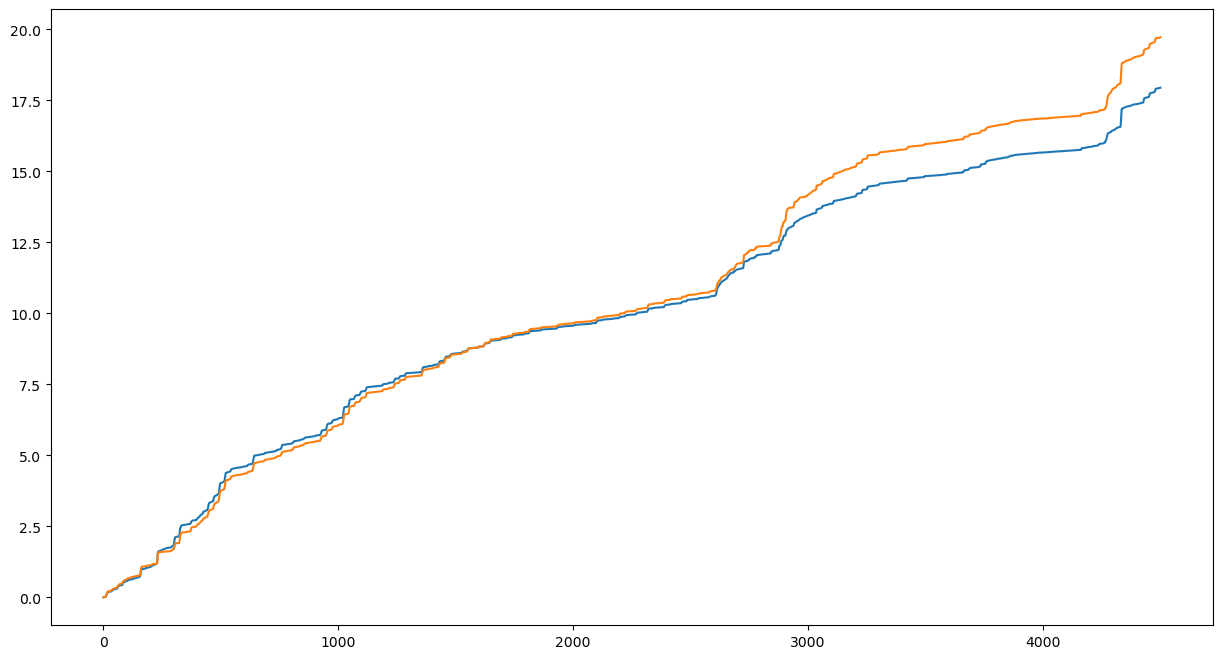

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharex=True, sharey=True)
res1 = pd.read_csv(f'../residuals/base_model_k_pos.csv', index_col=0)
res2 = pd.read_csv(f'../residuals/base_model.csv', index_col=0)
r1 = (res1**2).mean(axis=1).cumsum()
r2 = (res2**2).mean(axis=1).cumsum()
plt.plot(r1)
plt.plot(r2)


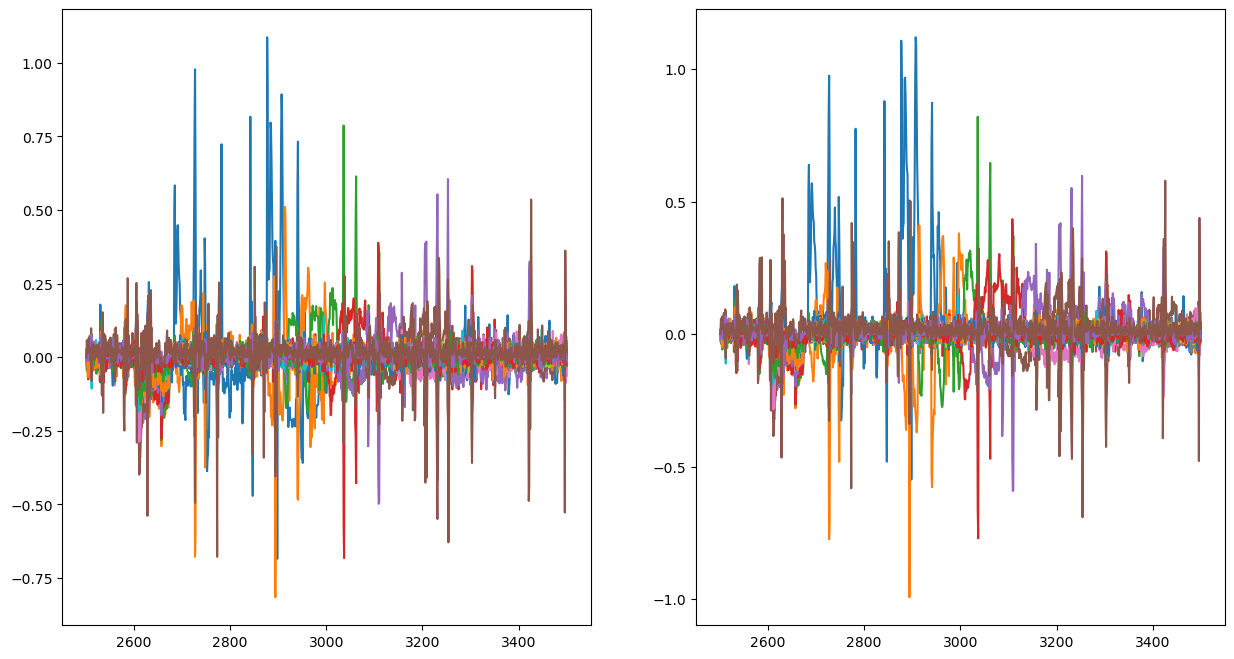

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].plot(res1[2500:3500]);
ax[1].plot(res2[2500:3500]);

In [ ]:
r1_1 = pd.read_csv('../residuals/base_model_1.csv', index_col=0)
r1_24 = pd.read_csv('../residuals/base_model_24.csv', index_col=0)
r1_48 = pd.read_csv('../residuals/base_model_48.csv', index_col=0)
r1_1w = pd.read_csv('../residuals/base_model_168.csv', index_col=0)
r1_2w = pd.read_csv('../residuals/base_model_336.csv', index_col=0)
r1_4w = pd.read_csv('../residuals/base_model_672.csv', index_col=0)
r1_sim = pd.read_csv('../residuals/base_model_sim.csv', index_col=0)

r2_1 = pd.read_csv('../residuals/base_model4_1.csv', index_col=0)
r2_24 = pd.read_csv('../residuals/base_model4_24.csv', index_col=0)
r2_48 = pd.read_csv('../residuals/base_model4_48.csv', index_col=0)
r2_1w = pd.read_csv('../residuals/base_model4_168.csv', index_col=0)
r2_2w = pd.read_csv('../residuals/base_model4_336.csv', index_col=0)
r2_4w = pd.read_csv('../residuals/base_model4_672.csv', index_col=0)
r2_sim = pd.read_csv('../residuals/base_model4_sim.csv', index_col=0)

r3_1 = pd.read_csv('../residuals/base_model_k_neg_1.csv', index_col=0)
r3_24 = pd.read_csv('../residuals/base_model_k_neg_24.csv', index_col=0)
r3_48 = pd.read_csv('../residuals/base_model_k_neg_48.csv', index_col=0)
r3_1w = pd.read_csv('../residuals/base_model_k_neg_168.csv', index_col=0)
r3_2w = pd.read_csv('../residuals/base_model_k_neg_336.csv', index_col=0)
r3_4w = pd.read_csv('../residuals/base_model_k_neg_672.csv', index_col=0)
r3_sim = pd.read_csv('../residuals/base_model_k_neg_sim.csv', index_col=0)

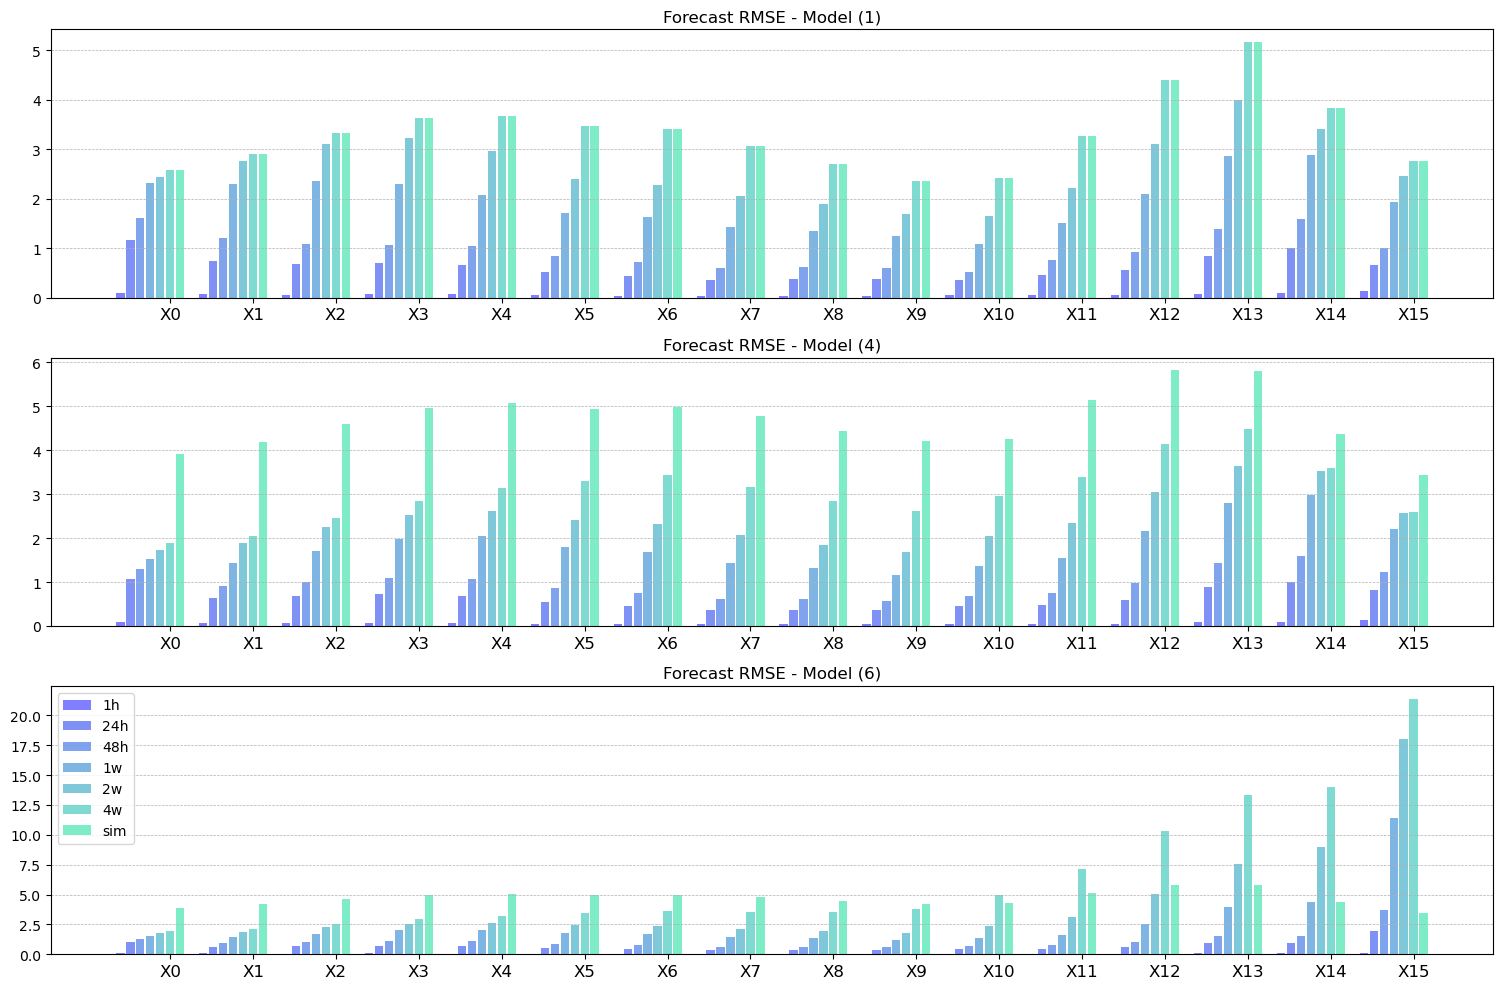

In [ ]:
r1 = [r1_1, r1_24, r1_48, r1_1w, r1_2w, r1_4w, r1_sim]
r2 = [r2_1, r2_24, r2_48, r2_1w, r2_2w, r2_4w, r2_sim]
r3 = [r3_1, r3_24, r3_48, r3_1w, r3_2w, r3_4w, r3_sim]
R = [r1, r2, r3]
titles = ['Model (1)', 'Model (4)', 'Model (6)']

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False, sharey=False)
for j in range(3):
    r = R[j]
    for i in range(7):
        r_ = np.sqrt((r[i]**2).mean())
        ax[j].bar(np.arange(len(r_))+i*0.12-0.6, (r_), alpha=0.5, width=0.1, color = cm.winter(i/7))
        ax[j].set_xticks(np.arange(len(r_)))
        ax[j].set_xticklabels(r_.index, fontsize = 12)
        ax[j].grid(True, axis = 'y', linestyle='--', linewidth=0.5)
        ax[j].set_title(f'Forecast RMSE - {titles[j]}', fontsize = 12)
ax[2].legend(['1h', '24h', '48h', '1w', '2w', '4w', 'sim'], loc='upper left')
fig.tight_layout()

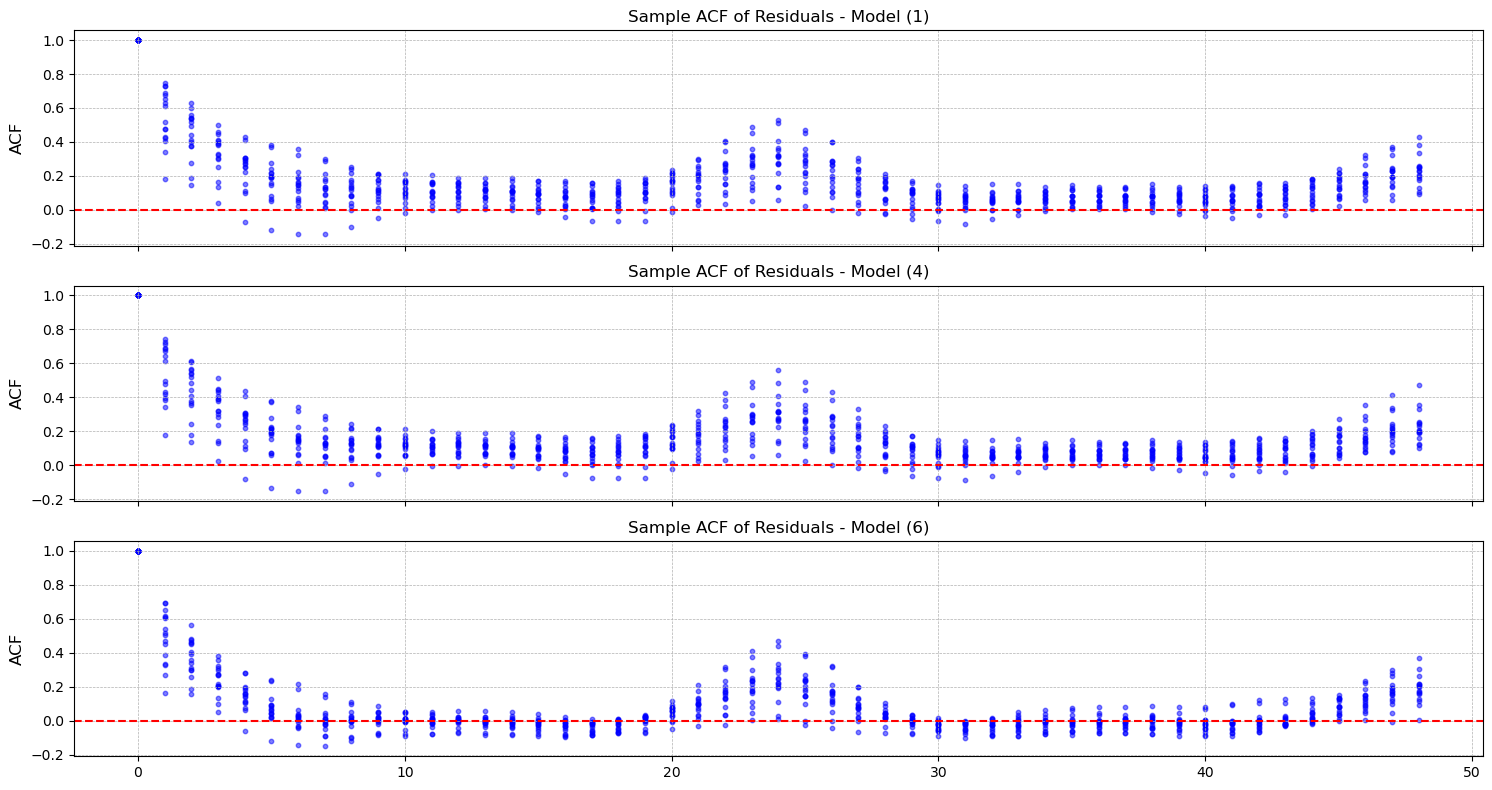

In [ ]:
import numpy as np
from numpy import log, exp
from statsmodels.tsa.stattools import acf
import matplotlib.cm as cm


fig, ax = plt.subplots(3, 1, figsize=(15, 8), sharex=True, sharey=True)

res = pd.read_csv(f'../residuals/base_model_1.csv', index_col=0)

for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[0].scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
ax[0].set_title('Sample ACF of Residuals - Model (1)', fontsize=12)
# ax[0].set_xlabel('Lag', fontsize=12)
ax[0].set_ylabel('ACF', fontsize=12)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[0].axhline(y=0, color='r', linestyle='--')

res = pd.read_csv(f'../residuals/base_model4_1.csv', index_col=0)

for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[1].scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
ax[1].set_title('Sample ACF of Residuals - Model (4)', fontsize=12)
# ax[1].set_xlabel('Lag', fontsize=12)
ax[1].set_ylabel('ACF', fontsize=12)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].axhline(y=0, color='r', linestyle='--')
res = pd.read_csv(f'../residuals/base_model_k_neg_1.csv', index_col=0)
for i in range(0, 16):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[2].scatter(np.arange(0, len(sacf)),sacf, color = 'blue', alpha = 0.5, s = 10)

# ax[2].legend()
ax[2].set_title('Sample ACF of Residuals - Model (6)', fontsize=12)
# ax[2].set_xlabel('Lag', fontsize=12)
ax[2].set_ylabel('ACF', fontsize=12)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].axhline(y=0, color='r', linestyle='--')
fig.tight_layout()

In [36]:
r1_1 = pd.read_csv('../residuals/ctsm2/basic2_1.csv', index_col=0)
r1_24 = pd.read_csv('../residuals/ctsm2/basic2_24.csv', index_col=0)
r1_48 = pd.read_csv('../residuals/ctsm2/basic2_48.csv', index_col=0)
r1_1w = pd.read_csv('../residuals/ctsm2/basic2_168.csv', index_col=0)
r1_2w = pd.read_csv('../residuals/ctsm2/basic2_336.csv', index_col=0)
r1_4w = pd.read_csv('../residuals/ctsm2/basic2_672.csv', index_col=0)
r1_sim = pd.read_csv('../residuals/ctsm2/basic2_sim.csv', index_col=0)

r2_1 = pd.read_csv('../residuals/ctsm2/augmented_3_1.csv', index_col=0)
r2_24 = pd.read_csv('../residuals/ctsm2/augmented_3_24.csv', index_col=0)
r2_48 = pd.read_csv('../residuals/ctsm2/augmented_3_48.csv', index_col=0)
r2_1w = pd.read_csv('../residuals/ctsm2/augmented_3_168.csv', index_col=0)
r2_2w = pd.read_csv('../residuals/ctsm2/augmented_3_336.csv', index_col=0)
r2_4w = pd.read_csv('../residuals/ctsm2/augmented_3_672.csv', index_col=0)
r2_sim = pd.read_csv('../residuals/ctsm2/augmented_3_sim.csv', index_col=0)

r3_1 = pd.read_csv('../residuals/ctsm2/augmented_5_new_1.csv', index_col=0)
r3_24 = pd.read_csv('../residuals/ctsm2/augmented_5_new_24.csv', index_col=0)
r3_48 = pd.read_csv('../residuals/ctsm2/augmented_5_new_48.csv', index_col=0)
r3_1w = pd.read_csv('../residuals/ctsm2/augmented_5_new_168.csv', index_col=0)
r3_2w = pd.read_csv('../residuals/ctsm2/augmented_5_new_336.csv', index_col=0)
r3_4w = pd.read_csv('../residuals/ctsm2/augmented_5_new_672.csv', index_col=0)
r3_sim = pd.read_csv('../residuals/ctsm2/augmented_5_new_sim.csv', index_col=0)

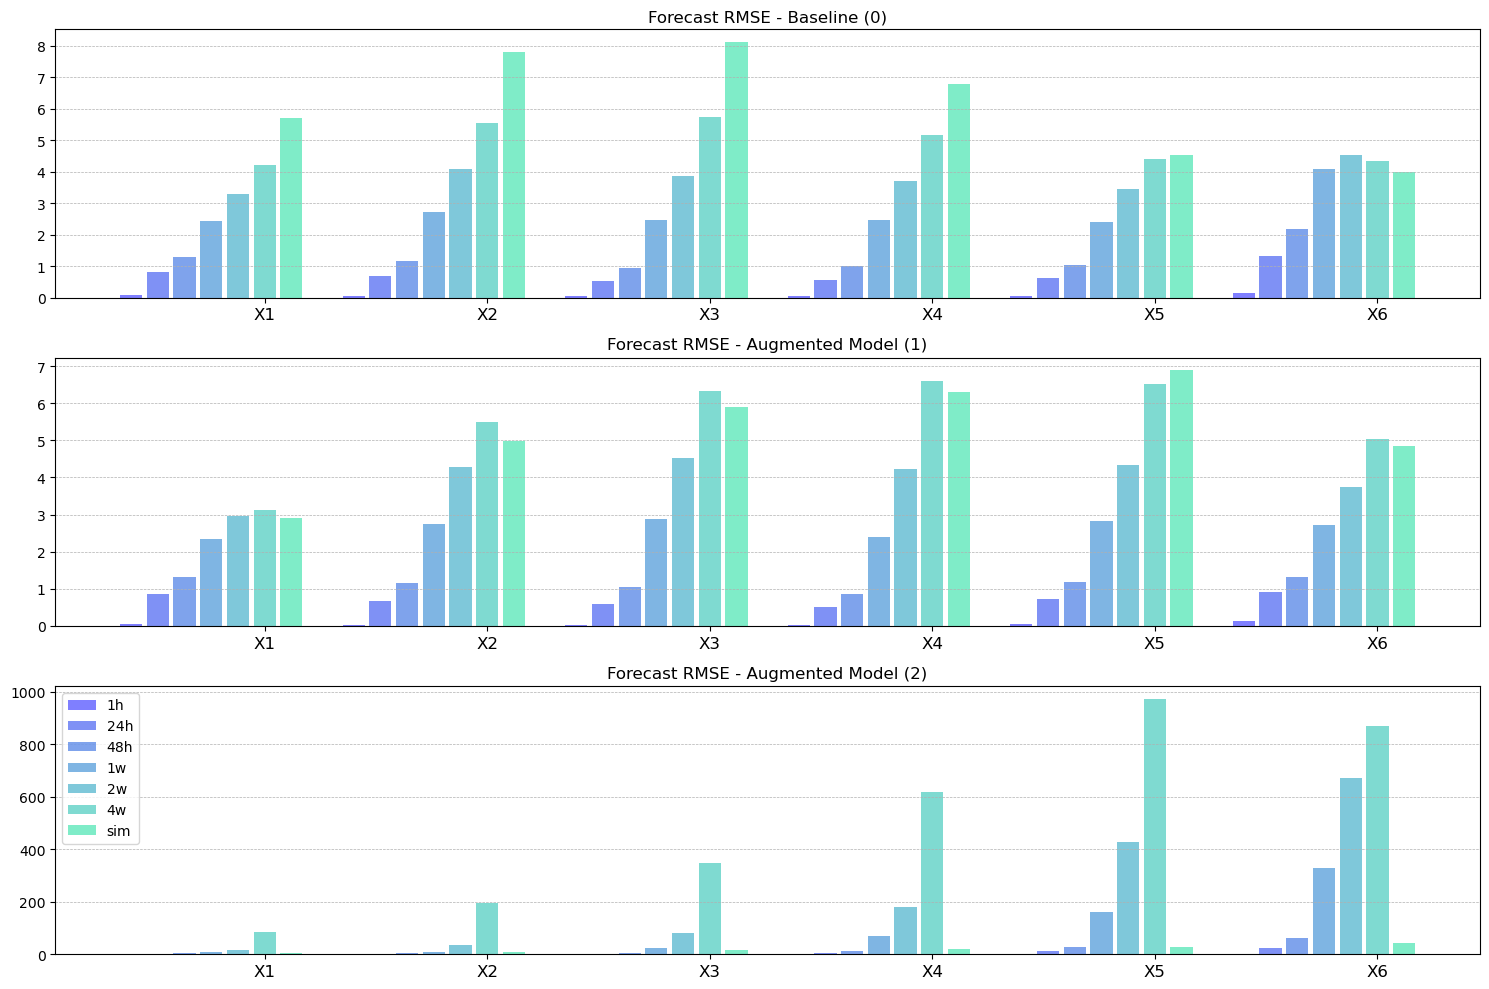

In [38]:
r1 = [r1_1, r1_24, r1_48, r1_1w, r1_2w, r1_4w, r1_sim]
r2 = [r2_1, r2_24, r2_48, r2_1w, r2_2w, r2_4w, r2_sim]
r3 = [r3_1, r3_24, r3_48, r3_1w, r3_2w, r3_4w, r3_sim]
R = [r1, r2, r3]
titles = ['Baseline (0)', 'Augmented Model (1)', 'Augmented Model (2)']

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False, sharey=False)
for j in range(3):
    r = R[j]
    for i in range(len(r)):
        r_ = np.sqrt((r[i]**2).mean())
        ax[j].bar(np.arange(len(r_))+i*0.12-0.6, (r_), alpha=0.5, width=0.1, color = cm.winter(i/7))
        ax[j].set_xticks(np.arange(len(r_)))
        ax[j].set_xticklabels(r_.index, fontsize = 12)
        ax[j].grid(True, axis = 'y', linestyle='--', linewidth=0.5)
        ax[j].set_title(f'Forecast RMSE - {titles[j]}', fontsize = 12)
ax[2].legend(['1h', '24h', '48h', '1w', '2w', '4w', 'sim'], loc='upper left')
fig.tight_layout()

In [45]:
(r3_sim**2).mean()



X1      22.240926
X2      96.032028
X3     230.225158
X4     469.347547
X5     861.360236
X6    1707.506664
dtype: float64

In [57]:
r1_1 = pd.read_csv('../residuals/ctsm2/basic2_1.csv', index_col=0)
r1_24 = pd.read_csv('../residuals/ctsm2/basic2_24.csv', index_col=0)
r1_48 = pd.read_csv('../residuals/ctsm2/basic2_48.csv', index_col=0)
r1_1w = pd.read_csv('../residuals/ctsm2/basic2_168.csv', index_col=0)
r1_2w = pd.read_csv('../residuals/ctsm2/basic2_336.csv', index_col=0)
r1_4w = pd.read_csv('../residuals/ctsm2/basic2_672.csv', index_col=0)
r1_sim = pd.read_csv('../residuals/ctsm2/basic2_sim.csv', index_col=0)

r2_1 = pd.read_csv('../residuals/ctsm2/augmented_3_1.csv', index_col=0)
r2_24 = pd.read_csv('../residuals/ctsm2/augmented_3_24.csv', index_col=0)
r2_48 = pd.read_csv('../residuals/ctsm2/augmented_3_48.csv', index_col=0)
r2_1w = pd.read_csv('../residuals/ctsm2/augmented_3_168.csv', index_col=0)
r2_2w = pd.read_csv('../residuals/ctsm2/augmented_3_336.csv', index_col=0)
r2_4w = pd.read_csv('../residuals/ctsm2/augmented_3_672.csv', index_col=0)
r2_sim = pd.read_csv('../residuals/ctsm2/augmented_3_sim.csv', index_col=0)

r3_1 = pd.read_csv('../residuals/ctsm2/augmented_6_1.csv', index_col=0)
r3_24 = pd.read_csv('../residuals/ctsm2/augmented_6_24.csv', index_col=0)
r3_48 = pd.read_csv('../residuals/ctsm2/augmented_6_48.csv', index_col=0)
# r3_1w = pd.read_csv('../residuals/ctsm2/augmented_6_168.csv', index_col=0)
# r3_2w = pd.read_csv('../residuals/ctsm2/augmented_6_336.csv', index_col=0)
# r3_4w = pd.read_csv('../residuals/ctsm2/augmented_6_672.csv', index_col=0)
# r3_sim = pd.read_csv('../residuals/ctsm2/augmented_6_sim.csv', index_col=0)


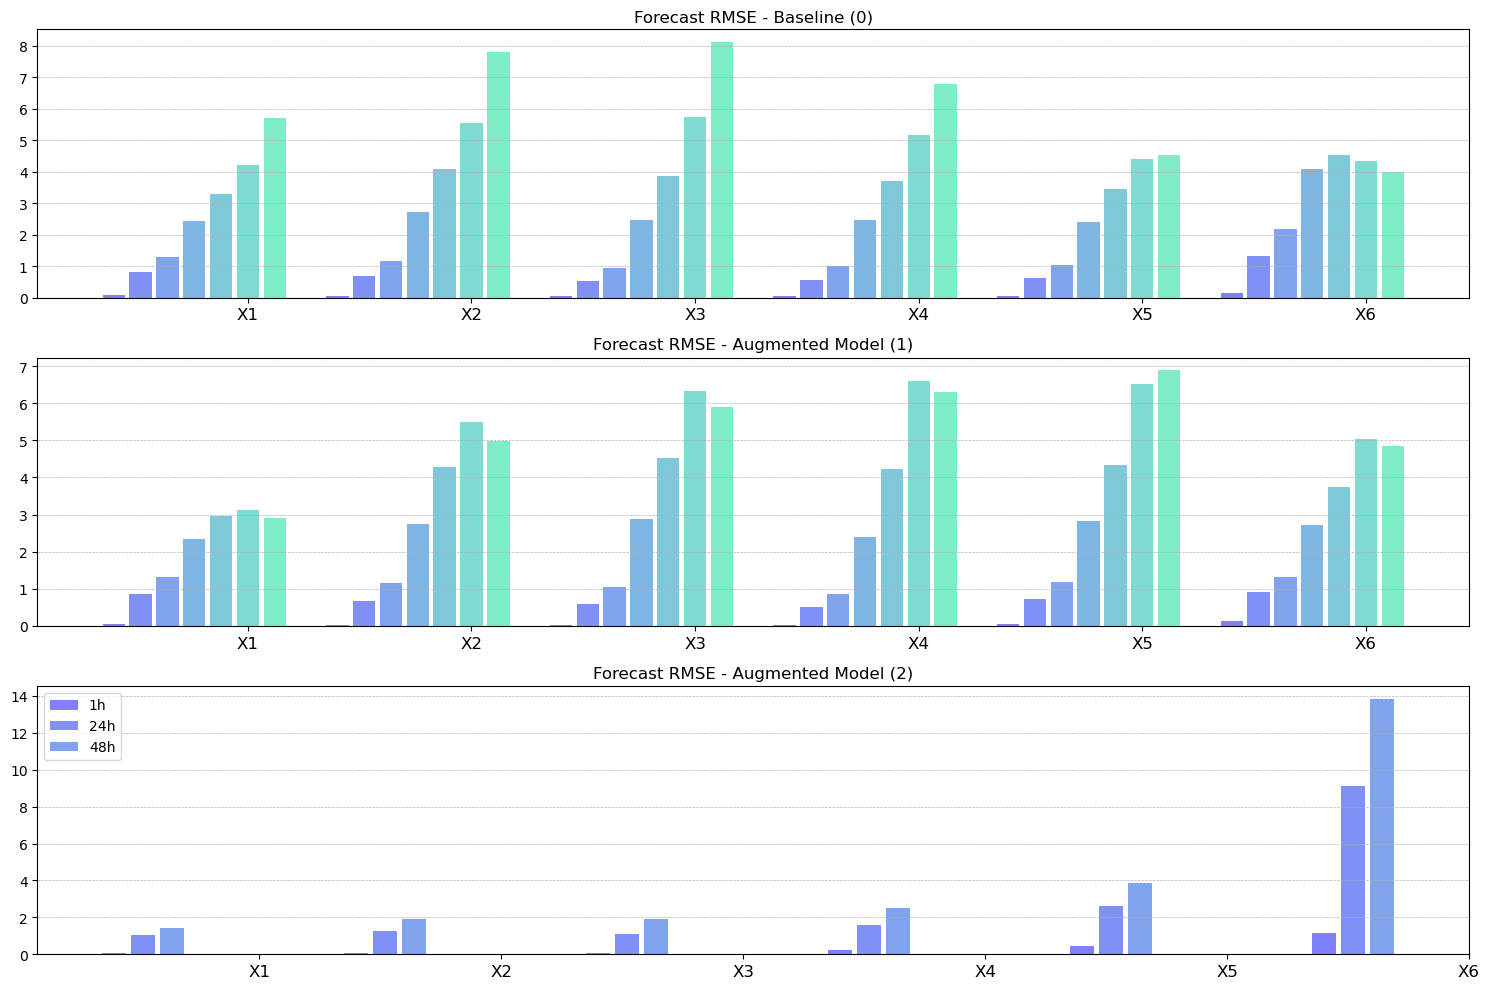

In [58]:
r1 = [r1_1, r1_24, r1_48, r1_1w, r1_2w, r1_4w, r1_sim]
r2 = [r2_1, r2_24, r2_48, r2_1w, r2_2w, r2_4w, r2_sim]
r3 = [r3_1, r3_24, r3_48]
      
    #    r3_1w, r3_2w, r3_4w, r3_sim]
R = [r1, r2, r3]
titles = ['Baseline (0)', 'Augmented Model (1)', 'Augmented Model (2)']

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False, sharey=False)
for j in range(3):
    r = R[j]
    for i in range(len(r)):
        r_ = np.sqrt((r[i]**2).mean())
        ax[j].bar(np.arange(len(r_))+i*0.12-0.6, (r_), alpha=0.5, width=0.1, color = cm.winter(i/7))
        ax[j].set_xticks(np.arange(len(r_)))
        ax[j].set_xticklabels(r_.index, fontsize = 12)
        ax[j].grid(True, axis = 'y', linestyle='--', linewidth=0.5)
        ax[j].set_title(f'Forecast RMSE - {titles[j]}', fontsize = 12)
ax[2].legend(['1h', '24h', '48h', '1w', '2w', '4w', 'sim'], loc='upper left')
fig.tight_layout()

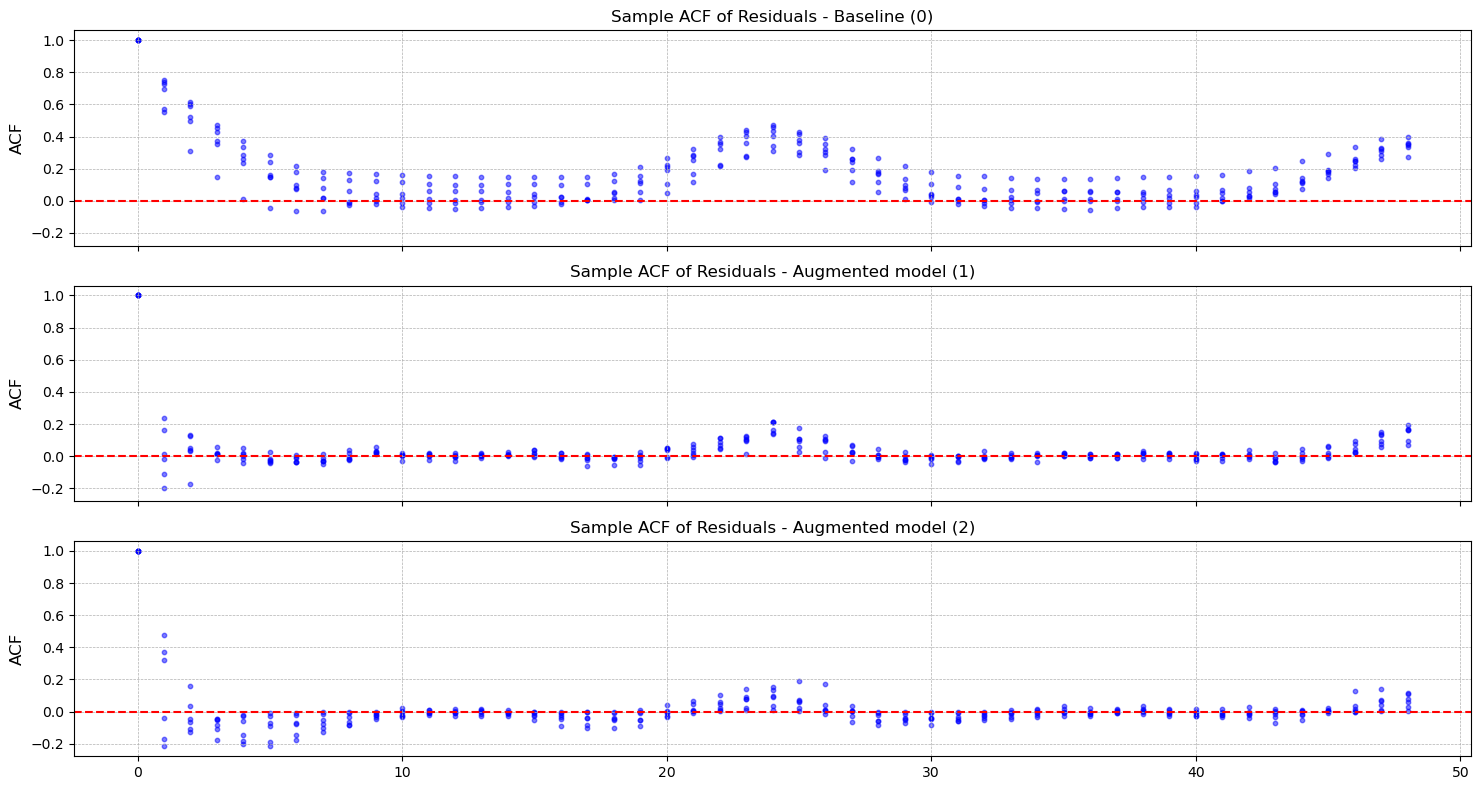

In [52]:
import numpy as np
from numpy import log, exp
from statsmodels.tsa.stattools import acf
import matplotlib.cm as cm


fig, ax = plt.subplots(3, 1, figsize=(15, 8), sharex=True, sharey=True)

res = pd.read_csv(f'../residuals/ctsm2/basic2_1.csv', index_col=0)

for i in range(1, 7):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[0].scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
ax[0].set_title('Sample ACF of Residuals - Baseline (0)', fontsize=12)
# ax[0].set_xlabel('Lag', fontsize=12)
ax[0].set_ylabel('ACF', fontsize=12)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[0].axhline(y=0, color='r', linestyle='--')

res = pd.read_csv(f'../residuals/ctsm2/augmented_3_1.csv', index_col=0)

for i in range(1, 7):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[1].scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
ax[1].set_title('Sample ACF of Residuals - Augmented model (1)', fontsize=12)
# ax[1].set_xlabel('Lag', fontsize=12)
ax[1].set_ylabel('ACF', fontsize=12)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].axhline(y=0, color='r', linestyle='--')


res = pd.read_csv(f'../residuals/ctsm2/augmented_5_new_1.csv', index_col=0)

for i in range(1, 7):
    sacf = acf(res[f'X{i}'], nlags=48)

    ax[2].scatter(np.arange(0,len(sacf)),sacf, label=f'X{i}', color = 'blue', alpha = 0.5, s = 10)

# ax.legend(ncol = 4)
ax[2].set_title('Sample ACF of Residuals - Augmented model (2)', fontsize=12)
# ax[1].set_xlabel('Lag', fontsize=12)
ax[2].set_ylabel('ACF', fontsize=12)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].axhline(y=0, color='r', linestyle='--')

fig.tight_layout()

In [ ]:
np.arange(len(r))+i*0.001

array([6.0000e-03, 1.0060e+00, 2.0060e+00, 3.0060e+00, 4.0060e+00,
       5.0060e+00, 6.0060e+00, 7.0060e+00, 8.0060e+00, 9.0060e+00,
       1.0006e+01, 1.1006e+01, 1.2006e+01, 1.3006e+01, 1.4006e+01,
       1.5006e+01])